<a class="anchor" id="0"></a>
# Multi-class classification using ANNs and Vanilla (simple) DL Models
# Digit recognition (Pattern Recognition) using the MNIST Dataset- with Keras
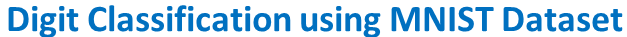

# 

In [ ]:
!pip install --upgrade ipywidgets notebook
# go to Run menu and select Restart & Clear cell outputs option

# Objective of the notebook <a class="anchor" id="1"></a>



- In this notebook, we will design a **Multilayer Perceptron (MLP)** model of the MNIST dataset. 

- **Multilayer Perceptrons (MLPs)** usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting the data. 

- These MLP models are also referred to as **feedforward neural networks**. MLPs are common in simple logistic and linear regression problems.

- So, the objective is to create a neural network for identifying numbers based on handwritten digits. For example, when the input to the network is an image of a handwritten number 8, the corresponding prediction must also be the digit 8. 

- To both train and validate a neural network, there must be a sufficiently large dataset of handwritten digits.

- The Modified National Institute of Standards and Technology dataset or MNIST dataset for short, is often considered as the Hello World! of deep learning and is a suitable dataset for handwritten digit classification.

- MNIST is used to explain and validate deep learning theories because the 70,000 samples it contains are small, yet sufficiently rich in information (MNIST dataset is described later).

So, we will start by importing the necessary libraries:

# I - Designing an ANN model using Sci-learn ML Library <a class="anchor" id="5"></a>

# 1. Import necessary libraries <a class="anchor" id="2"></a>



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# conda install  TensorFlow
# The Official Keras Deep Neural Network Example for CNN 
###############################
# Setting Seed Random Number for Reproducibility
import numpy as np # linear algebra
np.random.seed(123)  # for reproducibility

# Setting Seed Random Number for the TensorFlow Backend
import tensorflow as tf
tf.random.set_seed(123) # for reproducibility

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
#%matplotlib inline

from tensorflow import keras
from keras import  backend as K

# 2. Loading MNIST dataset <a class="anchor" id="3"></a>



The **MNIST** dataset (**Modified National Institute of Standards and Technology database**) is a large collection of **handwritten digits** that is widely used for training and testing in the field of machine learning and image processing. Here are some key points about it:

- MNIST is a collection of handwritten digits ranging from the number 0 to 9. 

- It consists of 60,000 training images and 10,000 test images of handwritten digits, each image being 28x28 pixels in grayscale.

- The dataset is commonly used to **benchmark machine learning algorithms**, particularly in the areas of image recognition and classification.

- To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.

- Variants: There are extended versions like EMNIST, which includes handwritten letters, and Fashion MNIST, which contains images of fashion products.


The following Keras code shows how to load MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets.

In [ ]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data() # ouput numpy arrays


# 3. Data exploration and visualization <a class="anchor" id="4"></a>




- The following code will help to sample the 25 random MNIST digits and visualize them.

In [ ]:
print(type(x_train))
print("x_train shape:", x_train.shape )
print("x_test shape:",x_test.shape )
print("y_train shape:",y_train.shape )
print("y_test shape:",y_test.shape )

In [ ]:
print("labels: ",np.unique(y_train)) # multi-classification

# count the number of unique train labels
category_name, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(category_name, counts)))

# count the number of unique test labels
category_name, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(category_name, counts)))


In [ ]:
# sample 9 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=9)
images = x_train[indexes]
labels = y_train[indexes]

# plot the 9 mnist digits
plt.figure(figsize=(3,3))
for i in range(len(indexes)):
    plt.subplot(3, 3, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

# 4 Data Preprocessing <a class="anchor" id="4"></a>

- **One-Hot Encode the Labels**: Convert the class labels (0-9) into one-hot encoded vectors. This is necessary for the output layer of the ANN.
- **Reshape the Data**: Since ANNs expect 1D input, you need to flatten the 28x28 images into 1D vectors of size 784.
- **Normalize the Data**: Scale the pixel values to the range [0, 1] by dividing by 255. This helps the network train faster and more effectively.

### 4.1 One-Hot Encode the Labels <a class="anchor" id="5.2"></a>

The number of labels is computed as:

In [ ]:
np.unique(y_train)

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)

Keras requires your output variable to be one-hot encoded values in the case of multy-classification.

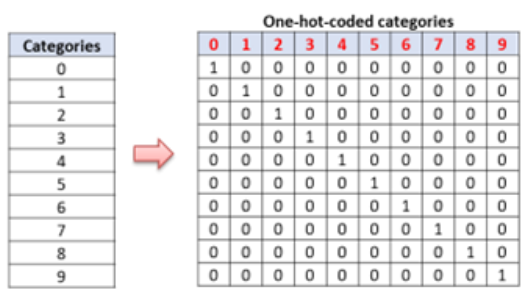

**One-hot encoding** is necessary if you use **categorical_crossentropy loss** when training the model. However if you use **sparse_categorical_crossentropy** then you can skip this step.

**The following lines convert each label into a one-hot vector**:

In [ ]:
from tensorflow.keras.utils import to_categorical, plot_model
# convert to one-hot vector
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print ("A sample output before encoding: ",y_train[0])
print ("A sample output after encoding: ",Y_train[0])

### 4.2 Reshape the Data
Each image is **28 pixels in height** and **28 pixels in width**, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

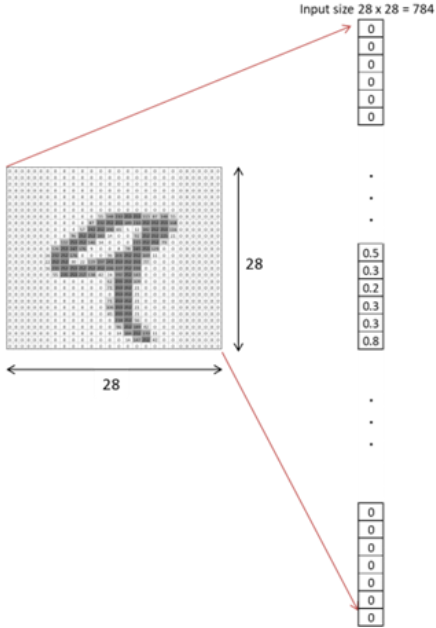


In [ ]:
# image dimensions
image_height = x_train.shape[1]
input_width = x_train.shape[2]
input_size = image_height * input_width
print(input_size)

In [ ]:
# Resize the images
X_train = np.reshape(x_train, [-1, input_size])
X_test = np.reshape(x_test, [-1, input_size])

print("x_train shape before the re-shaping:", x_train.shape )
print("x_train shape after flattening:", X_train.shape )

### 4.3 Normalize the Data

In [ ]:
# Preprocess input data
print("Range of X_train data before re-scaling: [ ", max(X_train[0].round(2)), ',', min(X_train[0]), ' ]' )
# Scale image data to the [0, 1] range
X_train_ = X_train.astype('float32') / 255
X_test_ = X_test.astype('float32') / 255

print("Range of X_train data after re-scaling: [ ", max(X_train_[0].round(2)), ',', min(X_train[0]), ' ]' )

# 5. Designing ANN model architecture using Sci-learn ML Library <a class="anchor" id="5"></a>


- The MLP model, discussed above can be used for MNIST digits classification. 

- The MLP model is a fully connected network.

### 5.1 Design ANN model <a class="anchor" id="5.5"></a>

- Now, we will set the network parameters as follows:

In [ ]:
from sklearn.neural_network import MLPClassifier
# ('identity', 'logistic', 'tanh', 'relu')

# ('identity', 'logistic', 'tanh', 'relu')
# Design an ANN model
ANN = MLPClassifier(hidden_layer_sizes=..., 
                    solver=..., 
                    activation=...,
                    max_iter=50,
                    random_state=1, 
                    alpha=1e-04) # alpha=1e-04 
ANN
# ANN = MLPClassifier(hidden_layer_sizes=350, solver='adam', activation="relu", random_state=1, alpha=1e-04,  max_iter=1000, early_stopping=True, n_iter_no_change =1000, validation_fraction=0.1 )


# Hidden layer activation functions {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# Activation function for the all hidden layers is the same
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
# MLPClassifier uses the Average Cross-Entropy loss function. In the current version you can not set this parameter.
# MLPClassifier uses softmax transfer function as output activation function for Multiclass-Classification. In the current version you can not set this parameter.


### 5.2 Train the ANN model <a class="anchor" id="5.5"></a>

In [ ]:
# Train the ANN model


In [ ]:
print(ANN.out_activation_)
print(ANN.n_outputs_)
print(ANN.n_features_in_)

### 5.3 Evaluate the ANN model <a class="anchor" id="5.5"></a>

In [ ]:
# Find out and display the test and training accuracies
...
...

In [ ]:
# Visualize Evaluation Metrics of ML Models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Make predictions
Y_pred = ANN.predict(X_test_)
Y_pred_categorical = np.argmax(Y_pred, axis=1) # convert softmax output (ANN prediction) into the categorical label
Y_test_categorical = np.argmax(Y_test, axis=1) # convert one-hot encoded label into the categorical label

# Compute the confusion matrix
cm = confusion_matrix(Y_test_categorical, Y_pred_categorical)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### 5.4 Monitoring the training process <a class="anchor" id="5.5"></a>

In [ ]:
print('Number of the training: {}'.format(ANN.n_iter_)) # Default value for the max_iter parameter is 200

In [ ]:
print('Number of the training: {}'.format(ANN.n_iter_))
trn_loss= ANN.loss_curve_ #errors
#validation_scores = ANN.validation_scores_ #validation_scores_ is not available if early_stopping=False

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 5
plt.plot( trn_loss, label='Losses') # errors plot
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.title('Training Losses over Iterations')

# II - Designing ANN model using Keras DL Library <a class="anchor" id="5"></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
# network parameters
batch_size = 128

- The **batch_size** argument indicates the number of data that we will use for each update of the model parameters.


# 1. Designing ANN model using Keras DL Library <a class="anchor" id="5"></a>

### 1.1 Designing the model architecture <a class="anchor" id="5.6"></a>


- The next step is to design the model architecture. The proposed model is made of three MLP layers. 

- In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer. 

- Both the first and second MLP layers are identical in nature with 256 neurons each and with relu activation. 

- Output layer has 10 neurons, which is equal to the number of the categories and with softmax activation. 

- The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.

- The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers and can be created in the following way:

`from keras.models import Sequential`

`model = Sequential()`

- The model in Keras is considered as a sequence of layers and each of them gradually “distills” the input data to obtain the desired output.

- In Keras, we can add the required types of layers through the **add()** method.

In [ ]:
# Design an ANN model with a 3-layer and  ReLU using the Keras
model = ...

- Since a Dense layer is a linear operation, a sequence of Dense layers can only approximate a linear function. 

- The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings. 

- relu or Rectified Linear Unit (ReLU) is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

### 1.2 View model summary <a class="anchor" id="5.7"></a>

- Keras library provides us **summary()** method to check the model description.

In [ ]:
model.summary()

- The above listing shows the model summary of the proposed network. It requires a total of 269,322 parameters.

- This is substantial considering that we have a simple task of classifying MNIST digits. So, MLPs are not parameter efficient. 

- The total number of parameters required can be computed as follows:

  - From input to Dense layer: 784 × 256 + 256 = 200,960. 
  
  - From first Dense to second Dense: 256 × 256 + 256 = 65,792. 
  
  - From second Dense to the output layer: 10 × 256 + 10 = 2,570. 
  
  - The total is 200,690 + 65,972 + 2,570 = 269,322.

- Another way of verifying the network is by calling the **plot_model()** method as follows:

In [ ]:
plot_model(model, to_file='mlp-mnist_plot.png', 
           show_shapes=True, 
           show_layer_names=True, 
           dpi=50, 
           show_layer_activations=True,
           show_trainable=True)

### 1.3 Compile the model with compile() method <a class="anchor" id="6.1"></a>


- Compilation of model can be done as follows:

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

### Loss function (categorical_crossentropy)

- How far the predicted tensor is from the one-hot ground truth vector is called **loss**.

- In this example, we use **categorical_crossentropy** as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction. 

- There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning. 

- For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

### Optimization (optimizer adam)

- With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

- In Keras, there are several choices for optimizers. The most commonly used optimizers are; **Stochastic Gradient Descent (SGD)**, **Adaptive Moments (Adam)** and **Root Mean Squared Propagation (RMSprop)**. 

- Each optimizer features tunable parameters like learning rate, momentum, and decay. 

- Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

### Metrics (accuracy)

- Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss. 

- During training, validation, and testing, other metrics such as **accuracy** can also be included. 

- **Accuracy** is the percent, or fraction, of correct predictions based on ground truth.

### 1.4 Train the model with fit() method <a class="anchor" id="6.2"></a>

In [ ]:
# Fit your model
history = model.fit(....,    validation_split=0.1
                   ) 

### 1.5 Evaluating model performance with evaluate() method <a class="anchor" id="6.3"></a>

In [ ]:
loss, acc = model.evaluate(X_train_, Y_train, batch_size=batch_size)
print("\nTraining accuracy: %.1f%%" % (100.0 * acc))

loss, acc = model.evaluate(X_test_, Y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

### 1.6 Monitoring the training process <a class="anchor" id="6.3"></a>

In [ ]:
pd.DataFrame(history.history).head()

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
# Set x-axis ticks to be integers
plt.xticks(np.arange(0, len(history.history['loss']), step=5))  # This sets ticks from 0 to 10
plt.ylabel('Errors')  
plt.xlabel('Iterarions')  
plt.legend()
plt.show()

In [ ]:
plt.title('accuracy')
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
# Set x-axis ticks to be integers
plt.xticks(np.arange(0, len(history.history['loss']), step=5))  # This sets ticks from 0 to 10
plt.ylabel('Accuracies')  
plt.xlabel('Iterarions')  
plt.legend()
plt.show()

# 2. Results and Conclusion <a class="anchor" id="8"></a>


- In this notebook, We build a ANN neural network model using Keras DL library to classify the MNIST digits and predict accuracy.



In [ ]:
# Visualize Evaluation Metrics of ML Models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Make predictions
Y_pred = model.predict(X_test_)
Y_pred_categorical = np.argmax(Y_pred, axis=1)
Y_test_categorical = np.argmax(Y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(Y_test_categorical, Y_pred_categorical)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(Y_test_categorical, Y_pred_categorical))

# Developing a User Interface to interact with the trained model
# 3. Using the trained model in the production environment (UI for scoring or inference)

*Draw a digit on the black background* using the Paint application and save it as **png** image. As seen the following example:

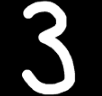

In [ ]:
# Draw a number on the black background using the Paint application and save it as png image. As seen in the example above:
# Execute this cell to make available the upload button and upload your image from your computer to the kaggle notebook. 
import ipywidgets as widgets
from ipywidgets import interact
# Define the widget
file_upload = widgets.FileUpload(
    accept='.png',   # The type of files to accept
    multiple=False    # Whether to allow to upload multiple files or not
)

# Display the widget
display(file_upload)

In [ ]:
#Run this cell to see the prediction for your uploaded image.

if  len(file_upload.data)!=0:
    import io
    rawdata = file_upload.data[0]
    #When you need to handle binary data (like images or files) without saving them to disk, io.BytesIO can be very handy
    img = io.BytesIO(rawdata)
    # loading and displaying the sample image
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt 
    img=Image.open(img).convert('L').resize((28, 28))
    
    # convert('L') loads the image as gray scale image.
    img=np.array(img) # convert the image into the Numpy array.
    
    # Plot the image
    plt.figure(figsize=(2, 2))  # Width: 2 inches, Height: 2 inches
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()
    # Print the Shape of image as it is a Numpy Array
    print("Image is reshaped into:", img.shape)

    # Scalling the image so that all pixel values can fall into 
    # the range of 1 to 0 
    # Same as our training samples
    img=img/255
    # reshape our image data matrix 
    # so that match input shape of the our trained perceptron network 
    img=img.reshape(-1, 28*28)
    print('Flattened image shape:\n',img.shape)
    prediction = model.predict(img)
    prediction = np.argmax(prediction, axis=1)
    print("Prediction for the uploaded image is: ", prediction)

# References <a class="anchor" id="9"></a>

1. https://keras.io/api/datasets/mnist/






